In [97]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

In [98]:
placement = pd.read_csv('datasets_596958_1073629_Placement_Data_Full_Class.csv')
placement

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [99]:
for i in range(len(placement)):
    if placement['salary'].isna()[i] == True:
        placement['salary'][i] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [100]:
placement

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [101]:
map_gender = {'M':0, 'F':1}
placement['gender'] = placement['gender'].map(map_gender.get)

In [102]:
map_ssc_b = {'Central':0, 'Others':1}
map_hsc_b = {'Central':0, 'Others':1}
map_hsc_s = {'Commerce':0, 'Science':1, 'Arts':2}
map_degree_t = {'Comm&Mgmt':0, 'Sci&Tech':1, 'Others':2}
map_workex = {'Yes':0, 'No':1}
map_special = {'Mkt&Fin':0, 'Mkt&HR':1}
map_status = {'Placed':0 ,'Not Placed':1}

#map_list = [map_ssc_b, map_hsc_b, map_hsc_s, map_degree_t, map_workex, map_special, map_status]

placement['ssc_b'] = placement['ssc_b'].map(map_ssc_b.get)
placement['hsc_b'] = placement['hsc_b'].map(map_hsc_b.get)
placement['hsc_s'] = placement['hsc_s'].map(map_hsc_s.get)
placement['degree_t'] = placement['degree_t'].map(map_degree_t.get)
placement['workex'] = placement['workex'].map(map_workex.get)
placement['specialisation'] = placement['specialisation'].map(map_special.get)
placement['status'] = placement['status'].map(map_status.get)

In [103]:
placement

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,1,91.00,1,0,58.00,1,1,55.0,1,58.80,0,270000.0
1,2,0,79.33,0,78.33,1,1,77.48,1,0,86.5,0,66.28,0,200000.0
2,3,0,65.00,0,68.00,0,2,64.00,0,1,75.0,0,57.80,0,250000.0
3,4,0,56.00,0,52.00,0,1,52.00,1,1,66.0,1,59.43,1,0.0
4,5,0,85.80,0,73.60,0,0,73.30,0,1,96.8,0,55.50,0,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,0,80.60,1,82.00,1,0,77.60,0,1,91.0,0,74.49,0,400000.0
211,212,0,58.00,1,60.00,1,1,72.00,1,1,74.0,0,53.62,0,275000.0
212,213,0,67.00,1,67.00,1,0,73.00,0,0,59.0,0,69.72,0,295000.0
213,214,1,74.00,1,66.00,1,0,58.00,0,1,70.0,1,60.23,0,204000.0


In [105]:
placement = placement.iloc[:,1:14]
placement

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,1,91.00,1,0,58.00,1,1,55.0,1,58.80,0
1,0,79.33,0,78.33,1,1,77.48,1,0,86.5,0,66.28,0
2,0,65.00,0,68.00,0,2,64.00,0,1,75.0,0,57.80,0
3,0,56.00,0,52.00,0,1,52.00,1,1,66.0,1,59.43,1
4,0,85.80,0,73.60,0,0,73.30,0,1,96.8,0,55.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,1,82.00,1,0,77.60,0,1,91.0,0,74.49,0
211,0,58.00,1,60.00,1,1,72.00,1,1,74.0,0,53.62,0
212,0,67.00,1,67.00,1,0,73.00,0,0,59.0,0,69.72,0
213,1,74.00,1,66.00,1,0,58.00,0,1,70.0,1,60.23,0


In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
placement[:] = scaler.fit_transform(placement[:])
placement

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0.0,0.538240,1.0,0.889621,1.0,0.0,0.195122,0.5,1.0,0.104167,1.0,0.284483,0.0
1,0.0,0.792414,0.0,0.680890,1.0,0.5,0.670244,0.5,0.0,0.760417,0.0,0.564843,0.0
2,0.0,0.497011,0.0,0.510708,0.0,1.0,0.341463,0.0,1.0,0.520833,0.0,0.247001,0.0
3,0.0,0.311482,0.0,0.247117,0.0,0.5,0.048780,0.5,1.0,0.333333,1.0,0.308096,1.0
4,0.0,0.925788,0.0,0.602965,0.0,0.0,0.568293,0.0,1.0,0.975000,0.0,0.160795,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.0,0.818594,1.0,0.741351,1.0,0.0,0.673171,0.0,1.0,0.854167,0.0,0.872564,0.0
211,0.0,0.352711,1.0,0.378913,1.0,0.5,0.536585,0.5,1.0,0.500000,0.0,0.090330,0.0
212,0.0,0.538240,1.0,0.494234,1.0,0.0,0.560976,0.0,0.0,0.187500,0.0,0.693778,0.0
213,1.0,0.682540,1.0,0.477759,1.0,0.0,0.195122,0.0,1.0,0.416667,1.0,0.338081,0.0


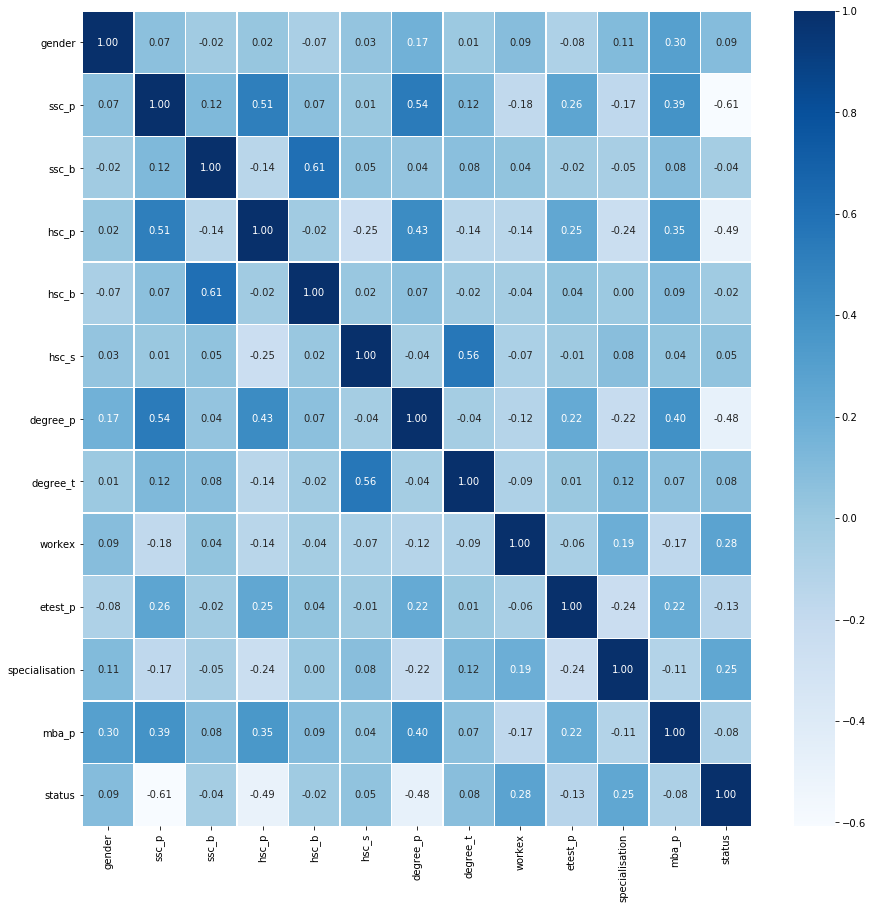

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(data = placement.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

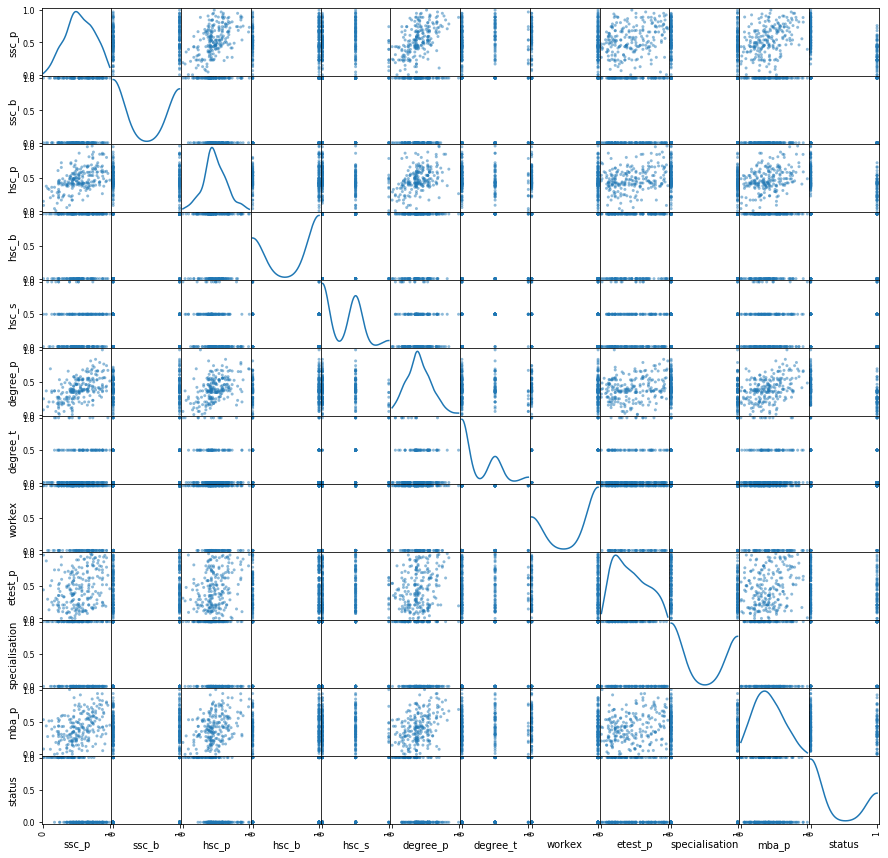

In [94]:
from pandas.plotting import scatter_matrix
scatter_matrix(placement,alpha=0.5,figsize=(15, 15),diagonal='kde')
plt.show()

In [108]:
Y = placement['status']
Y

0      0.0
1      0.0
2      0.0
3      1.0
4      0.0
      ... 
210    0.0
211    0.0
212    0.0
213    0.0
214    1.0
Name: status, Length: 215, dtype: float64

In [113]:
X = placement.iloc[:,0:12]
X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0.0,0.538240,1.0,0.889621,1.0,0.0,0.195122,0.5,1.0,0.104167,1.0,0.284483
1,0.0,0.792414,0.0,0.680890,1.0,0.5,0.670244,0.5,0.0,0.760417,0.0,0.564843
2,0.0,0.497011,0.0,0.510708,0.0,1.0,0.341463,0.0,1.0,0.520833,0.0,0.247001
3,0.0,0.311482,0.0,0.247117,0.0,0.5,0.048780,0.5,1.0,0.333333,1.0,0.308096
4,0.0,0.925788,0.0,0.602965,0.0,0.0,0.568293,0.0,1.0,0.975000,0.0,0.160795
...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.0,0.818594,1.0,0.741351,1.0,0.0,0.673171,0.0,1.0,0.854167,0.0,0.872564
211,0.0,0.352711,1.0,0.378913,1.0,0.5,0.536585,0.5,1.0,0.500000,0.0,0.090330
212,0.0,0.538240,1.0,0.494234,1.0,0.0,0.560976,0.0,0.0,0.187500,0.0,0.693778
213,1.0,0.682540,1.0,0.477759,1.0,0.0,0.195122,0.0,1.0,0.416667,1.0,0.338081


In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('총 테스트 개수:%d, 오류개수:%d' %(len(y_test), (y_test != y_pred).sum()))
print('정확도: %.2f' %accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=[1,0],target_names=['Not Placed','Placed']))

confusion_matrix(y_test, y_pred, labels=[1,0])

총 테스트 개수:43, 오류개수:8
정확도: 0.81
              precision    recall  f1-score   support

  Not Placed       0.83      0.62      0.71        16
      Placed       0.81      0.93      0.86        27

    accuracy                           0.81        43
   macro avg       0.82      0.78      0.79        43
weighted avg       0.82      0.81      0.81        43



array([[10,  6],
       [ 2, 25]], dtype=int64)

In [81]:
y_pred

array([1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0.])

In [170]:
y_test

198    1.0
37     0.0
89     0.0
168    1.0
171    0.0
75     1.0
96     0.0
137    0.0
5      1.0
83     0.0
55     0.0
145    0.0
160    0.0
112    0.0
74     0.0
203    0.0
126    0.0
12     1.0
153    0.0
158    1.0
169    1.0
141    1.0
209    0.0
190    1.0
144    1.0
18     1.0
185    0.0
15     0.0
86     0.0
71     0.0
7      0.0
63     1.0
143    0.0
97     1.0
136    1.0
162    0.0
33     0.0
154    0.0
90     0.0
211    0.0
106    1.0
181    1.0
139    0.0
Name: status, dtype: float64

In [175]:
print("Intercept: ",model.intercept_)
print("Coefficients: ",model.coef_)

Intercept:  [1.02981295]
Coefficients:  [[ 0.3168359  -3.5773857  -0.16236304 -1.97393672  0.07987365 -0.37179817
  -2.04226465  0.75672522  0.98429987  0.3053801   0.5480284   0.84382569]]


In [115]:
import statsmodels.api as sm
x2 = sm.add_constant(X)
model = sm.OLS(Y, x2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 status   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     21.34
Date:                Thu, 25 Jun 2020   Prob (F-statistic):           7.08e-30
Time:                        19:28:37   Log-Likelihood:                -51.583
No. Observations:                 215   AIC:                             129.2
Df Residuals:                     202   BIC:                             173.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.9208      0.100      9.